<a href="https://colab.research.google.com/github/ABHIRAM199/Gen-AI/blob/main/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recurrent Neural Networks (RNNs)

#Agenda
* Introduction to RNNs
* Architecture of RNNs
* Forward Propagation in Recurrent Neural Networks (RNNs)
* Backpropagation Through Time (BPTT)
* Types of RNNs
* Applications of RNNs

# Introduction to RNNs

What is Recurrent Neural Network (RNN)?
Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other. Still, in cases when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. The main and most important feature of RNN is its Hidden state, which remembers some information about a
sequence. The state is also referred to as Memory State since it remembers the previous input to the network. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.



**Key Characteristics of RNNs:**
- **Handling Sequential Data:** RNNs are well-suited for processing sequential data due to their ability to maintain internal states or memory of past inputs. This enables them to consider the context of each input in relation to the previous inputs in the sequence.

- **Recurrent Connections:** RNNs are characterized by recurrent connections that allow information to persist over time. These recurrent connections create loops in the network architecture, enabling RNNs to share information across different time steps.

- **Temporal Dynamics:** By leveraging recurrent connections, RNNs can capture temporal dependencies in sequential data. This means they can learn patterns and relationships that evolve over time, making them effective for tasks such as time series prediction, natural language processing, and speech recognition.

- **Variable-Length Inputs:** RNNs can handle inputs of variable length, making them flexible for processing sequences of different lengths. This is particularly useful in natural language processing tasks where sentences or documents may vary in length.

- **Training and Learning:** RNNs are typically trained using backpropagation through time (BPTT), a variant of backpropagation that extends across multiple time steps. This allows RNNs to learn from sequences of data by adjusting their parameters based on gradients computed over time.

**Applications of RNNs:**

- **Sequence Modeling:** RNNs are widely used for tasks involving sequence modeling, such as language modeling, speech recognition, and handwriting recognition.

- **Time Series Prediction:** RNNs are effective for predicting future values in time series data, such as stock prices, weather forecasts, and sensor data.

- **Natural Language Processing (NLP):** RNNs are commonly used in NLP tasks such as text generation, machine translation, sentiment analysis, and named entity recognition.

- **Image Captioning:** RNNs combined with convolutional neural networks (CNNs) are used for generating descriptive captions for images by understanding their content and context.

- **Video Analysis:** RNNs can analyze sequential data in videos, such as action recognition, video summarization, and anomaly detection.

####How RNN differs from Feedforward Neural Network?

- Artificial neural networks that do not have looping nodes are called feed forward neural networks. Because all information is only passed forward, this kind of neural network is also referred to as a multi-layer neural network.

- Information moves from the input layer to the output layer – if any hidden layers are present – unidirectionally in a feedforward neural network. These networks are appropriate for image classification tasks, for example, where input and output are independent. Nevertheless, their inability to retain previous inputs automatically renders them less useful for sequential data analysis.



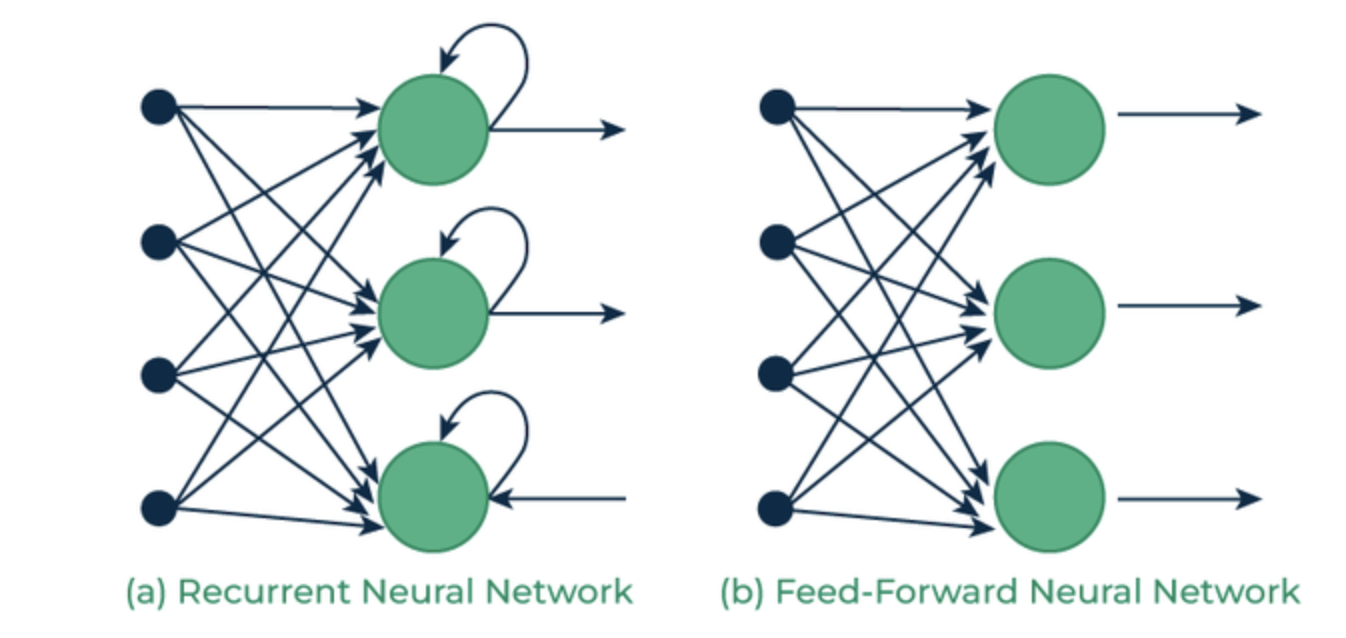

###Types Of RNN


**There are four types of RNNs based on the number of inputs and outputs in the network.**

- One to One
- One to Many
- Many to One
- Many to Many

**One to One**
- This type of RNN behaves the same as any simple Neural network it is also known as Vanilla Neural Network. In this Neural network, there is only one input and one output.

**One To Many**
- In this type of RNN, there is one input and many outputs associated with it. One of the most used examples of this network is Image captioning where given an image we predict a sentence having Multiple words.

**Many to One**
- In this type of network, Many inputs are fed to the network at several states of the network generating only one output. This type of network is used in the problems like sentimental analysis. Where we give multiple words as input and predict only the sentiment of the sentence as output.


**Many to Many**
- In this type of neural network, there are multiple inputs and multiple outputs corresponding to a problem. One Example of this Problem will be language translation. In language translation, we provide multiple words from one language as input and predict multiple words from the second language as output.





#Architecture of RNNs

The architecture of Recurrent Neural Networks (RNNs) consists of several key components that enable them to process sequential data efficiently. Let's break down the architecture and provide a visual representation:

- **Input Layer:**
The input layer receives sequential data as input. Each element of the sequence is represented as a feature vector or input vector. In language tasks, for example, each word in a sentence may be represented as a one-hot encoded vector or an embedding vector.

- **Recurrent Connections:**
The recurrent connections are the defining characteristic of RNNs. These connections allow information to persist over time by feeding the output of the network from the previous time step back into the network at the current time step. This enables the network to capture temporal dependencies and context across different time steps.

- **Hidden State:**
The hidden state of the RNN represents the memory or internal state of the network. It captures information about the input sequence processed up to the current time step. The hidden state is updated recursively at each time step based on the current input and the previous hidden state.

- **Output Layer:**
The output layer of the RNN produces the output for each time step or sequence. Depending on the task, the output layer may consist of a single neuron (for binary classification tasks), multiple neurons (for multi-class classification tasks), or continuous values (for regression tasks).

- **Activation Function:**
An activation function is applied to the output of each neuron in the network to introduce non-linearity and enable the network to learn complex patterns in the data. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit).

Architecture.svg

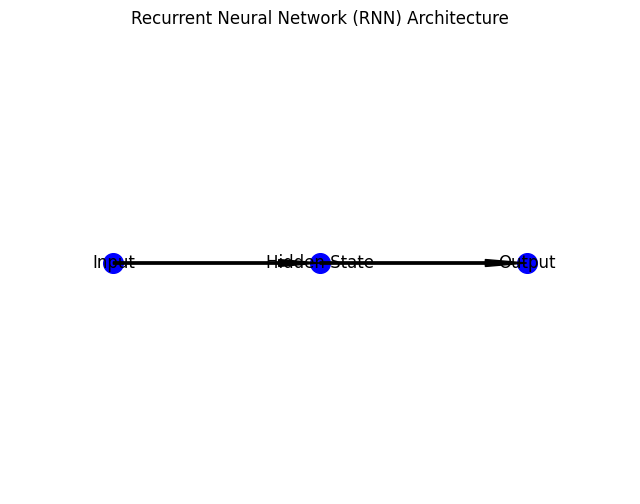

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define node positions
nodes = {
    'Input': (0, 0),
    'Hidden State': (2, 0),
    'Output': (4, 0)
}

# Plot nodes
for node, pos in nodes.items():
    ax.scatter(pos[0], pos[1], color='blue', s=200)
    ax.text(pos[0], pos[1], node, ha='center', va='center', fontsize=12)

# Plot arrows
arrows = [
    Arrow(nodes['Input'][0], nodes['Input'][1], nodes['Hidden State'][0] - nodes['Input'][0], nodes['Hidden State'][1] - nodes['Input'][1], color='black', width=0.05),
    Arrow(nodes['Hidden State'][0], nodes['Hidden State'][1], nodes['Output'][0] - nodes['Hidden State'][0], nodes['Output'][1] - nodes['Hidden State'][1], color='black', width=0.05)
]

for arrow in arrows:
    ax.add_patch(arrow)

# Set axis limits and labels
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 1)
ax.axis('off')

# Show plot
plt.title("Recurrent Neural Network (RNN) Architecture")
plt.show()



#Forward Propagation in Recurrent Neural Networks (RNNs)

- Forward Propagation in Recurrent Neural Networks (RNNs) involves processing input sequences one element at a time. At each time step, the RNN updates its internal state based on the current input and the previous state.

Explanation of Forward Propagation in RNNs
- **Input Sequence:** An input sequence is provided to the RNN, where each element of the sequence is processed one at a time.
- **Hidden State Update:** The hidden state (also called the internal state) is updated at each time step. This update is based on the current input and the previous hidden state.
- **Output Generation:** At each time step, the RNN generates an output which can be used for prediction tasks or passed to subsequent layers.


**The equations governing forward propagation in RNNs are**:

$h_t = 𝜙(W_h.x_t + U_h.h_{t-1} + b_h)$

$y_t = 𝜙(W_y.h_t + b_y)$


Where:

$h_t$ is the hidden state at time step $t$,

$x_t$ is the input at time step $t$,

$y_t$ is the output at time step $t$,

$W_h$, $U_h$, and $W_y$ are the weight matrices,

$b_h$, and $b_y$ are the biases,

and

$𝜙$ is the activation function (e.g., tanh, ReLU)

####Illustration forward propagation in an RNN using NumPy

In [ ]:
import numpy as np

# Activation function (e.g., tanh)
def tanh(x):
    return np.tanh(x)

# Initialize weights and biases
W_h = np.random.randn(3, 3)  # Weight matrix for input to hidden
U_h = np.random.randn(3, 3)  # Weight matrix for hidden to hidden
W_y = np.random.randn(1, 3)  # Weight matrix for hidden to output
b_h = np.random.randn(3)     # Bias for hidden layer
b_y = np.random.randn(1)     # Bias for output layer

# Input sequence (3 time steps, each with 3 features)
input_sequence = [np.random.randn(3) for _ in range(3)]

# Initial hidden state
h_t = np.zeros(3)

# Forward propagation
for x_t in input_sequence:
    h_t = tanh(np.dot(W_h, x_t) + np.dot(U_h, h_t) + b_h)
    y_t = tanh(np.dot(W_y, h_t) + b_y)
    print(f"Hidden state: {h_t}, Output: {y_t}")



Hidden state: [-0.35161654 -0.59164736 -0.68017338], Output: [0.61245382]
Hidden state: [-0.54449187 -0.85701834  0.94149585], Output: [0.58298906]
Hidden state: [ 0.94596068 -0.8626942   0.29830652], Output: [0.96964362]


#### Visualization of Forward Propagation in RNNs

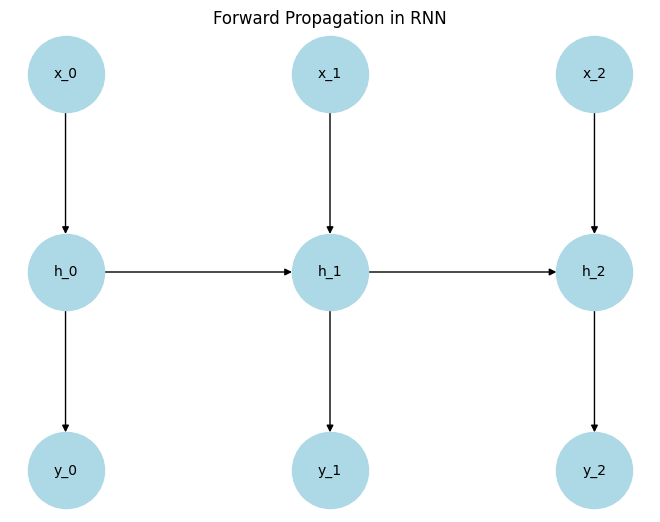

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for input, hidden, and output layers at each time step
time_steps = 3
for t in range(time_steps):
    G.add_node(f"x_{t}", pos=(t, 2), label=f"x_{t}")
    G.add_node(f"h_{t}", pos=(t, 1), label=f"h_{t}")
    G.add_node(f"y_{t}", pos=(t, 0), label=f"y_{t}")

# Add edges for connections at each time step
for t in range(time_steps):
    G.add_edge(f"x_{t}", f"h_{t}")
    G.add_edge(f"h_{t}", f"y_{t}")
    if t > 0:
        G.add_edge(f"h_{t-1}", f"h_{t}")

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='lightblue', font_size=10)
plt.title("Forward Propagation in RNN")
plt.show()


#Backpropagation Through Time (BPTT)

Backpropagation Through Time (BPTT) is the process used to train Recurrent Neural Networks (RNNs). It extends the traditional backpropagation algorithm to handle the sequential nature of RNNs by unrolling the network across time steps.

- **Unfolding the RNN:** In BPTT, the RNN is unfolded across time steps to create a deep feedforward network where each layer corresponds to a time step in the sequence.
- **Forward Propagation:** During forward propagation, the input sequence is processed, and hidden states are updated at each time step. The output at each time step is computed based on the current hidden state.
- **Loss Computation:** The loss function is computed based on the difference between the predicted outputs and the actual targets across all time steps.
- **Gradient Computation:** Gradients of the loss function with respect to the network parameters are computed by backpropagating the error through the unfolded network. The chain rule is applied to propagate errors back through time.
- **Parameter Updates:** The computed gradients are used to update the network parameters using gradient descent-based optimization algorithms.


#### Illustration

In [ ]:
import numpy as np

# Activation functions and their derivatives
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Initialize weights and biases
np.random.seed(42)
W_h = np.random.randn(3, 3)  # Weight matrix for input to hidden
U_h = np.random.randn(3, 3)  # Weight matrix for hidden to hidden
W_y = np.random.randn(1, 3)  # Weight matrix for hidden to output
b_h = np.random.randn(3)     # Bias for hidden layer
b_y = np.random.randn(1)     # Bias for output layer

# Training data (example)
input_sequence = [np.random.randn(3) for _ in range(3)]
target_sequence = [np.random.randn(1) for _ in range(3)]

# Hyperparameters
learning_rate = 0.01
n_epochs = 100

# Forward and Backward Propagation through time
for epoch in range(n_epochs):
    # Forward propagation
    h_states = []
    y_preds = []
    h_t = np.zeros(3)
    for x_t in input_sequence:
        h_t = tanh(np.dot(W_h, x_t) + np.dot(U_h, h_t) + b_h)
        y_t = np.dot(W_y, h_t) + b_y
        h_states.append(h_t)
        y_preds.append(y_t)

    # Compute loss (mean squared error)
    loss = np.mean([(y_t - y_true)**2 for y_t, y_true in zip(y_preds, target_sequence)])

    # Backward propagation through time
    dW_h = np.zeros_like(W_h)
    dU_h = np.zeros_like(U_h)
    dW_y = np.zeros_like(W_y)
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)

    dh_next = np.zeros(3)
    for t in reversed(range(len(input_sequence))):
        dy = y_preds[t] - target_sequence[t]
        dW_y += np.outer(dy, h_states[t])
        db_y += dy

        dh = np.dot(W_y.T, dy) + dh_next
        dh_raw = dh * tanh_derivative(h_states[t])
        db_h += dh_raw
        dW_h += np.outer(dh_raw, input_sequence[t])
        if t > 0:
            dU_h += np.outer(dh_raw, h_states[t-1])
        else:
            dU_h += np.outer(dh_raw, np.zeros(3))
        dh_next = np.dot(U_h.T, dh_raw)

    # Update weights and biases
    W_h -= learning_rate * dW_h
    U_h -= learning_rate * dU_h
    W_y -= learning_rate * dW_y
    b_h -= learning_rate * db_h
    b_y -= learning_rate * db_y

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Final learned parameters
print("Final learned weights and biases:")
print("W_h:", W_h)
print("U_h:", U_h)
print("W_y:", W_y)
print("b_h:", b_h)
print("b_y:", b_y)


Epoch 0, Loss: 4.75495819273958
Epoch 10, Loss: 0.6585481542067323
Epoch 20, Loss: 0.15278084306124454
Epoch 30, Loss: 0.04769576625128103
Epoch 40, Loss: 0.016928598894017818
Epoch 50, Loss: 0.006363747078634937
Epoch 60, Loss: 0.002485253403542151
Epoch 70, Loss: 0.0010030513428634143
Epoch 80, Loss: 0.0004168637085570001
Epoch 90, Loss: 0.00017754703769448223
Final learned weights and biases:
W_h: [[ 0.47271116  0.3666787   0.51635595]
 [ 1.51657216  0.30382987 -0.36972032]
 [ 1.59832853  0.39719091 -0.37443252]]
U_h: [[ 0.53090455 -0.47486003 -0.41622382]
 [ 0.25327935 -1.90069026 -1.66595751]
 [-0.54818278 -0.99677411  0.27603178]]
W_y: [[-1.09747121 -1.46067079  0.96503231]]
b_h: [-0.70005528 -0.44324565 -1.07578363]
b_y: [-0.02799369]


#Types of RNNs

**Vanishing Gradient Problem**
- Traditional RNNs suffer from the vanishing gradient problem, where the gradients used to update the network parameters diminish exponentially as they are backpropagated through time. This issue makes it difficult for RNNs to learn long-term dependencies in the data. When training RNNs on long sequences, the gradients can become very small, causing the learning process to stall.

**Long Short-Term Memory (LSTM)**
- LSTMs are a type of RNN architecture designed to address the vanishing gradient problem by introducing gated mechanisms that control the flow of information.

**An LSTM unit consists of:**
- Forget Gate: Decides which information to discard from the cell state.
- Input Gate: Decides which information to store in the cell state.
- Output Gate: Decides which information to output from the cell state.

These gates help LSTMs maintain long-term dependencies and learn more effectively on longer sequences.

**Gated Recurrent Unit (GRU)**
- GRUs are another variant of RNNs that simplify the architecture of LSTMs. GRUs combine the forget and input gates into a single update gate.

**A GRU unit consists of:**
- Update Gate: Controls the update of the hidden state by combining the functions of the forget and input gates.
- Reset Gate: Controls the combination of the new input with the previous hidden state.

GRUs offer a simpler and more computationally efficient architecture compared to LSTMs, while still addressing the vanishing gradient problem.

####Visualizing RNN Architectures in Python

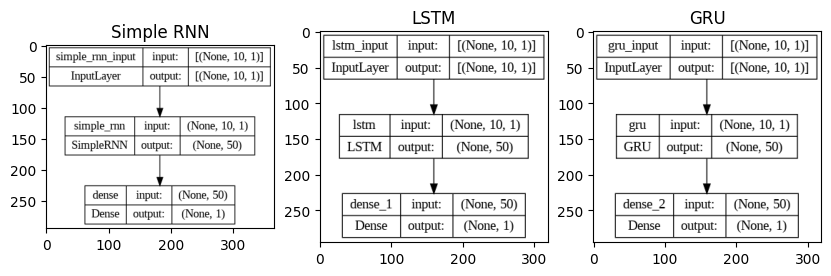

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define RNN model
def build_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(10, 1)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(10, 1)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define GRU model
def build_gru_model():
    model = Sequential()
    model.add(GRU(50, input_shape=(10, 1)))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build models
rnn_model = build_rnn_model()
lstm_model = build_lstm_model()
gru_model = build_gru_model()

# Plot models
plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)
plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)
plot_model(gru_model, to_file='gru_model.png', show_shapes=True, show_layer_names=True)

# Display the plots
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
img = mpimg.imread('rnn_model.png')
plt.imshow(img)
plt.title('Simple RNN')

plt.subplot(1, 3, 2)
img = mpimg.imread('lstm_model.png')
plt.imshow(img)
plt.title('LSTM')

plt.subplot(1, 3, 3)
img = mpimg.imread('gru_model.png')
plt.imshow(img)
plt.title('GRU')

plt.show()


#Applications of RNNs

Recurrent Neural Networks (RNNs) are powerful tools for modeling sequential data. They have found applications across various domains due to their ability to process sequences of data and capture temporal dependencies. Here are some key applications of RNNs:

**1. Natural Language Processing (NLP)**

RNNs are extensively used in NLP tasks where the order of words or tokens is crucial.

**Some common applications include:**
- Language Modeling: Predicting the next word in a sentence. RNNs can generate coherent and contextually relevant text.
- Machine Translation: Translating text from one language to another. Sequence-to-sequence (Seq2Seq) models, often based on RNNs, have been successful in this domain.
- Sentiment Analysis: Determining the sentiment of a given text (e.g., positive or negative review). RNNs can capture the sentiment by understanding the context of the words.
- Named Entity Recognition (NER): Identifying and classifying entities (like names of people, organizations, locations) in text. RNNs can learn to recognize patterns that signify different types of entities.

**2. Speech Recognition and Synthesis**

RNNs are well-suited for processing audio signals and have been widely used in:

- Speech Recognition: Converting spoken language into text. RNNs can model the sequential nature of speech and improve recognition accuracy.
- Speech Synthesis: Generating human-like speech from text. RNNs, especially in combination with other models like WaveNet, produce high-quality synthesized speech.

**3. Time Series Forecasting and Anomaly Detection**

RNNs excel in tasks involving time-dependent data, such as:

- Time Series Forecasting: Predicting future values of a time series (e.g., stock prices, weather data). RNNs can model the temporal dependencies and trends in the data.
- Anomaly Detection: Identifying unusual patterns or outliers in time series data (e.g., fraud detection, fault detection in machinery). RNNs can learn normal patterns and detect deviations.

**4. Sequence-to-Sequence Learning Tasks**

RNNs are particularly effective in tasks where both input and output are sequences:

- Sequence Generation: Generating sequences of data, such as text, music, or code. RNNs can generate coherent sequences based on learned patterns.
- Sequence Classification: Classifying sequences of data, such as sentiment classification of movie reviews or activity recognition from sensor data. RNNs can capture dependencies within the sequence to improve classification performance.

####Language Modeling with RNNs

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
import numpy as np

# Sample data: tokenized and integer-encoded text
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X = []
y = []

# Create input-output pairs
seq_length = 3
for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

X = np.array(X)
y = np.array(y)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=11, output_dim=10, input_length=seq_length),
    SimpleRNN(50, return_sequences=False),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X, y, epochs=100, verbose=2)

# Generate text
def generate_text(model, start_seq, num_gen=5):
    result = start_seq
    for _ in range(num_gen):
        padded_seq = np.array(result[-seq_length:]).reshape(1, seq_length)
        predicted = model.predict(padded_seq)
        next_word = np.argmax(predicted, axis=-1)[0]
        result.append(next_word)
    return result

# Generate a sequence
start_seq = [1, 2, 3]
generated_seq = generate_text(model, start_seq)
print("Generated sequence:", generated_seq)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             110       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                3050      
                                                                 
 dense_3 (Dense)             (None, 11)                561       
                                                                 
Total params: 3721 (14.54 KB)
Trainable params: 3721 (14.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1/1 - 1s - loss: 2.4142 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 2.4027 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 3/100
1/1 - 0s - loss: 2.3913 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 2.3799 - ac

####Time Series Forecasting with RNNs

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
3/3 - 2s - loss: 0.2196 - 2s/epoch - 806ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0950 - 22ms/epoch - 7ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0322 - 22ms/epoch - 7ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0177 - 33ms/epoch - 11ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0180 - 21ms/epoch - 7ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0241 - 37ms/epoch - 12ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0216 - 24ms/epoch - 8ms

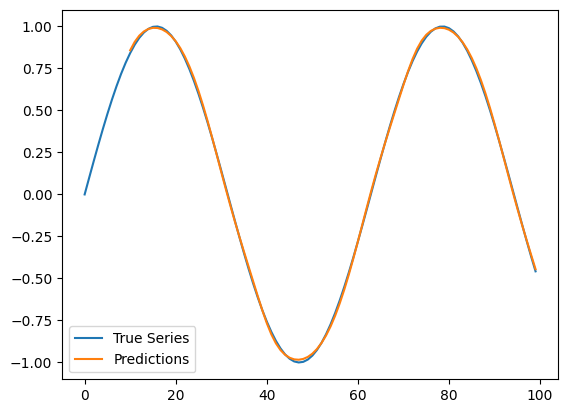

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate synthetic time series data
def generate_time_series(n_steps):
    return np.sin(0.1 * np.arange(n_steps))

series = generate_time_series(100)
n_steps = 10

# Prepare the data
X = []
y = []
for i in range(len(series) - n_steps):
    X.append(series[i:i+n_steps])
    y.append(series[i+n_steps])

X = np.array(X)
y = np.array(y)

# Define the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
model.fit(X[..., np.newaxis], y, epochs=100, verbose=2)

# Make predictions
pred = model.predict(X[..., np.newaxis])

# Plot the results
plt.plot(series, label='True Series')
plt.plot(np.arange(n_steps, len(series)), pred, label='Predictions')
plt.legend()
plt.show()
